In [ ]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid
#import gcm_filters

In [3]:
# #Unparameterized 1/2 degree run:
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
# fs = xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# #Contains default setup based on Jansen et al 2019. MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default/
# av_05_GMBS = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# ## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
# av_05_BS = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# ## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
# av_05_GM = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# #CBS=-1
# %cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg
# av_BS_new = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/



In [4]:
#Unparameterized 1/2 degree run:
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs = xr.open_dataset('static.nc', decode_times=False)
av=xr.open_dataset('averages_00031502.nc',decode_times=False)


xh = fs.xh.values
yh = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')#.fillna(0.); 
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')#.fillna(0.);


SSU = av['SSU']
SSV = av['SSV']
grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
SSU = grid.interp(SSU,axis='X')
SSV = grid.interp(SSV,axis='Y')
SKE_05 = (0.5*(SSU[0,]**2+SSV[0,:]**2))

# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

print('done part 3')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_05=KE_BT.mean('time')
KE_BC_05=KE_BC.mean('time')
fraction_BT_05=fraction_BT.mean('time')
fraction_BC_05=fraction_BC.mean('time')
print('done')

/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
done part 1
done part 2
done part 3
done


In [5]:
#Parameterized backscatter run:
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg
av_BS_new = xr.open_dataset('averages_00031502.nc', decode_times=False)  


h  = av_BS_new['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
#Outputs are comprised of 100 5-day averages.
u  = av_BS_new['u'];  u = grid.interp(u,axis='X')
v  = av_BS_new['v'];  v = grid.interp(v,axis='Y')


SSU = av_BS_new['SSU']
SSV = av_BS_new['SSV']
grid= Grid(av_BS_new, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
SSU = grid.interp(SSU,axis='X')
SSV = grid.interp(SSV,axis='Y')
SKE_BS_new = (0.5*(SSU[0,]**2+SSV[0,:]**2))


# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_BS_new=KE_BT.mean('time')
KE_BC_BS_new=KE_BC.mean('time')
fraction_BT_BS_new=fraction_BT.mean('time')
fraction_BC_BS_new=fraction_BC.mean('time')
print('done')

/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg
done


## Reading in data for 1/32 with no eddy parameterization:

In [6]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/
fs_hr = xr.open_dataset('static.nc', decode_times=False)
av_hr = xr.open_dataset('averages_00002502.nc', decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [7]:
%%time
xh_hr = fs_hr.xh.values
yh_hr = fs_hr.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

cfac=16 #coarsening factor to put data onto a 1/2 degree grid.
grid= Grid(av_hr, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av_hr['h'].mean('time').fillna(0.).coarsen(xh=cfac,yh=cfac, boundary="exact").mean() #coarsening
Depth=h.sum('zl')
print('done part 1')

u  = av_hr['u'];  u = grid.interp(u,axis='X').coarsen(xh=cfac,yh=cfac, boundary="exact").mean() #coarsening
print('done part 2')
v  = av_hr['v'];  v = grid.interp(v,axis='Y').coarsen(xh=cfac,yh=cfac, boundary="exact").mean() #coarsening


SSU = av_hr['SSU']
SSV = av_hr['SSV']
grid= Grid(av_hr, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
SSU = grid.interp(SSU,axis='X').coarsen(xh=cfac,yh=cfac, boundary="exact").mean()
SSV = grid.interp(SSV,axis='Y').coarsen(xh=cfac,yh=cfac, boundary="exact").mean()

SKE_HR = (0.5*(SSU[0,]**2+SSV[0,:]**2))
print('done 1')

# The mean BT and BC KE values:
u_TW=u*h/Depth; u_BT=u_TW.sum('zl'); u_BC=u-u_BT;

v_TW=v*h/Depth; v_BT=v_TW.sum('zl'); v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) 
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') 

print('done 2')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
#KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_HR=KE_BT.mean('time')
KE_BC_HR=KE_BC.mean('time')
fraction_BT_HR=fraction_BT.mean('time')
fraction_BC_HR=fraction_BC.mean('time')
print('done 3')

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/


done part 1
done part 2
done 1
done 2
done 3
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
CPU times: user 2min 31s, sys: 2min 53s, total: 5min 24s
Wall time: 5min 54s


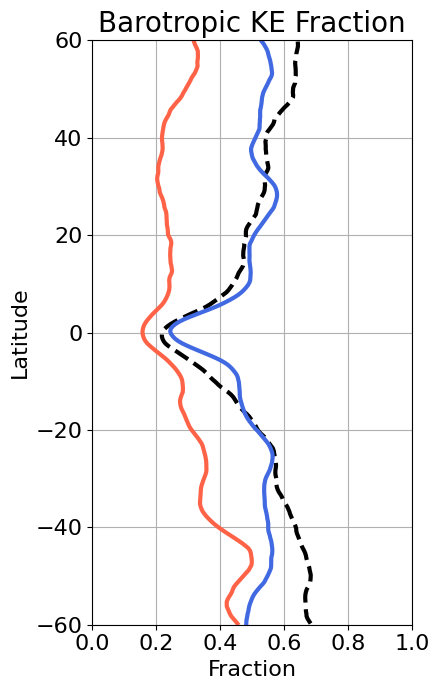

In [8]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.


fig,ax=plt.subplots(1,figsize=(4.5, 7), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1),dpi=100)

window=15
lim=20
plt.subplot(1,1,1)
plt.grid()
plt.plot(np.convolve((fraction_BT_HR.mean('xh').compute()), np.ones((window,))/window, mode='same')[lim:-lim],fraction_BT_HR.yh[lim:-lim],'--',c='k',linewidth=3); 
plt.plot(np.convolve((fraction_BT_05.mean('xh').compute()), np.ones((window,))/window, mode='same')[lim:-lim],fraction_BT_05.yh[lim:-lim],'-',c='tomato',linewidth=3); 
plt.plot(np.convolve((fraction_BT_BS_new.mean('xh').compute()), np.ones((window,))/window, mode='same')[lim:-lim],fraction_BT_BS_new.yh[lim:-lim],'-',c='royalblue',linewidth=3); 

#plt.legend(['Truth (1/32$^\circ$)','Unparameterized (1/2$^\circ$)','Parameterized (1/2$^\circ$)'],loc='lower left',fontsize=12)#,handlelength=4)

plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.ylim(-60, 60); plt.yticks(fontsize=16);
plt.xlim(0,1); plt.xticks(fontsize=16);
plt.xlabel('Fraction',fontsize=16)
plt.title('Barotropic KE Fraction',fontsize=20)
plt.ylabel('Latitude',fontsize=16)


plt.tight_layout()

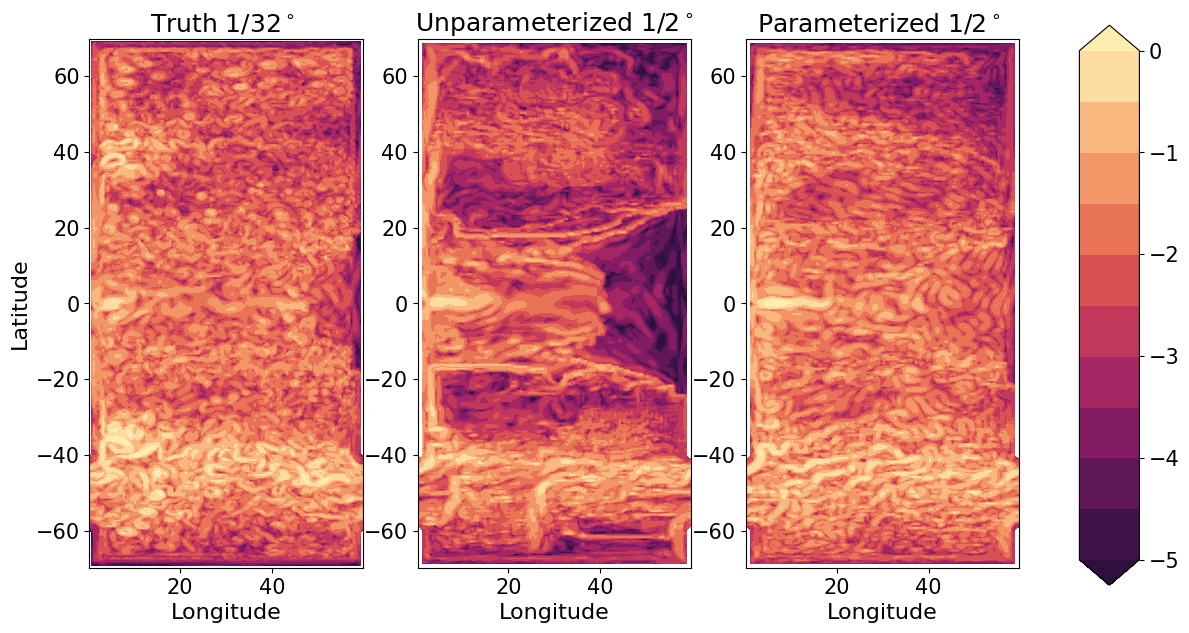

<Figure size 432x288 with 0 Axes>

In [18]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.

fig,ax=plt.subplots(3,figsize=(12, 7), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1),dpi=100)
#plt.tick_params(axis='both', which='major', labelsize=26)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.subplot(1,3,1)
levels=np.linspace(-5,0,11)
im =plt.contourf(xh,yh,np.log10(SKE_HR),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('Truth 1/32$^\circ$ ',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)


plt.subplot(1,3,2)
levels=np.linspace(-5,0,11)
plt.contourf(xh,yh,np.log10(SKE_05),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('Unparameterized 1/2$^\circ$',fontsize=18)
plt.xlabel('Longitude',fontsize=16)



plt.subplot(1,3,3)

levels=np.linspace(-5,0,11)
plt.contourf(xh,yh,np.log10(SKE_BS_new),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('Parameterized 1/2$^\circ$ ',fontsize=18)
plt.xlabel('Longitude',fontsize=16)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.10, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.show()
 
plt.tight_layout()

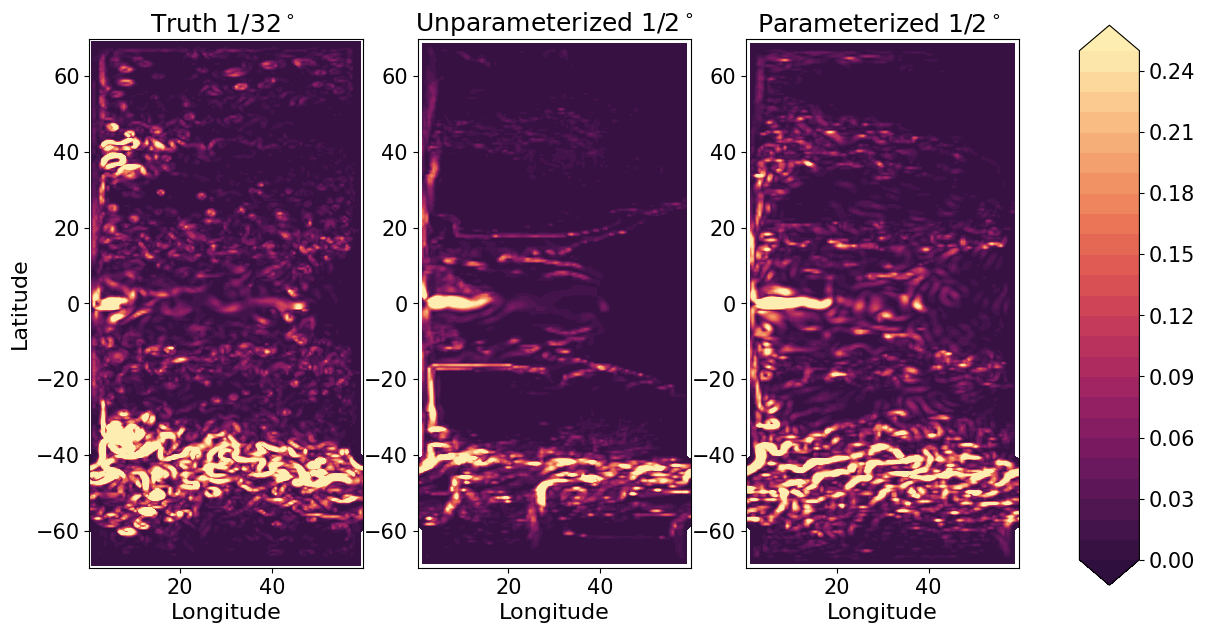

<Figure size 432x288 with 0 Axes>

In [29]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.

fig,ax=plt.subplots(3,figsize=(12, 7), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1),dpi=100)
#plt.tick_params(axis='both', which='major', labelsize=26)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.subplot(1,3,1)
levels=np.linspace(0,.25,26)
im =plt.contourf(xh,yh,(SKE_HR),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('Truth 1/32$^\circ$ ',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)


plt.subplot(1,3,2)
plt.contourf(xh,yh,(SKE_05),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('Unparameterized 1/2$^\circ$',fontsize=18)
plt.xlabel('Longitude',fontsize=16)



plt.subplot(1,3,3)

plt.contourf(xh,yh,(SKE_BS_new),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('Parameterized 1/2$^\circ$ ',fontsize=18)
plt.xlabel('Longitude',fontsize=16)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.10, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.show()
 
plt.tight_layout()

/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg


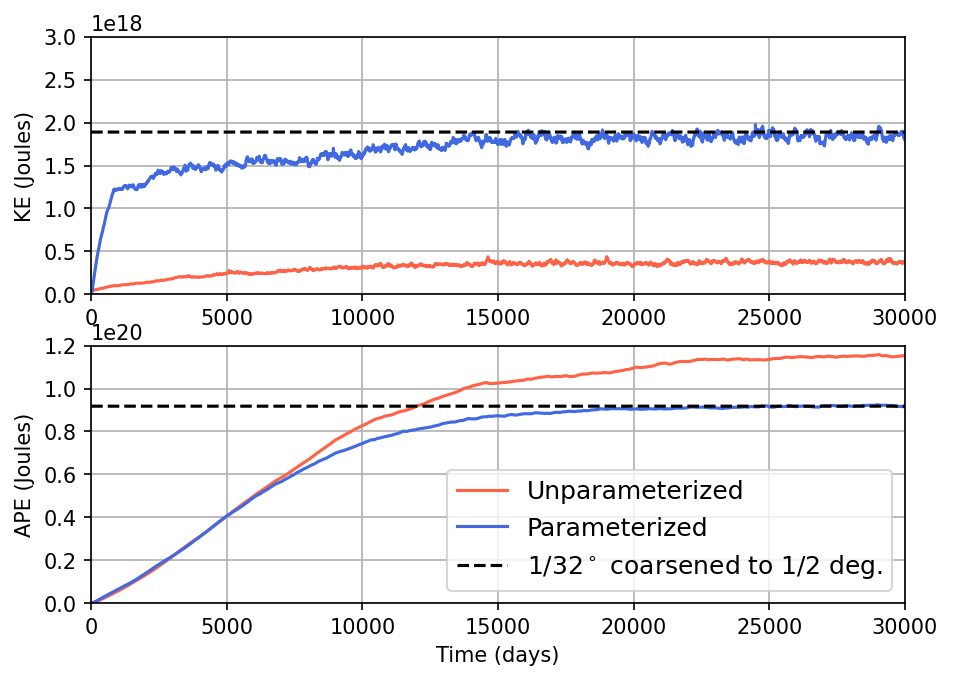

In [12]:
## 1/2 degree:
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
os = xr.open_dataset('ocean.stats.nc', decode_times=False)

%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg
os1 = xr.open_dataset('ocean.stats.nc', decode_times=False)

plt.figure(figsize=(7,5),dpi=150)
plt.subplot(2,1,1)
#plt.title('1/4 degree runs')

plt.plot(os.Time,os.KE.sum(axis=1),label='Unparameterized',color='tomato'); 
plt.plot(os1.Time,os1.KE.sum(axis=1),label='Parameterized',color='royalblue'); 
#plt.plot(osGMBS3.Time,osGMBS3.KE.sum(axis=1),label='Jansen et al. (2020)',color='gold'); 

plt.plot(os.Time,os.Time*0+1.89e18,'--',label='1/32$^\circ$ coarsened to 1/2 deg.',color='k')


plt.ylabel('KE (Joules)')
plt.grid('on')
# plt.xlim([0,30])
# plt.ylim([.02,.05e18])
plt.xlim([0,30000])
plt.ylim([0,3e18])
#plt.legend()
#plt.title('KE Timeseries')
plt.subplot(2,1,2)


plt.plot(os.Time,os.APE.sum(axis=1),label='Unparameterized',color='tomato'); 
plt.plot(os1.Time,os1.APE.sum(axis=1),label='Parameterized',color='royalblue'); 
#plt.plot(osGMBS3.Time,osGMBS3.APE.sum(axis=1),label='Jansen et al. (2020)',color='gold'); 

plt.plot(os.Time,os.Time*0+9.18e19,'--',label='1/32$^\circ$ coarsened to 1/2 deg.',color='k')


plt.grid('on')
# plt.xlim([0,30])
# plt.ylim([0,.0012e20])
plt.xlim([0,30000])
plt.ylim([0.e20,1.2e20])

#plt.title('APE Timeseries')
plt.ylabel('APE (Joules)')
plt.xlabel('Time (days)')
plt.legend(fontsize=12)
#plt.legend(bbox_to_anchor =(1., 1.),fontsize=7)